In [55]:
import tensorflow as tf
import numpy as np
import cv2
import time
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [56]:
%matplotlib inline

In [57]:
# SSD with Mobilenet v2

model_handle = 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2'

In [58]:
hub_model = hub.load(model_handle)

In [66]:
img = cv2.imread('data/test2.jpg')
img.shape

(354, 600, 3)

In [67]:
# resize image to 320x320
img = cv2.resize(img, (320, 320))

In [68]:
results = hub_model(img[np.newaxis, ...])

In [69]:


# Filter human class and get bounding boxes
# Filter entries which have detection_classes have 1
result = {key:value.numpy()[0] for key,value in results.items()}


In [70]:
# filter results where detection_classes == 1
human_idx = np.where(result['detection_classes'] == 1)

human_results = {}
human_results['detection_boxes'] = result['detection_boxes'][human_idx]
human_results['detection_scores'] = result['detection_scores'][human_idx]


In [71]:
# plot bounding boxes
for i in range(len(human_results['detection_boxes'])):
    box = human_results['detection_boxes'][i]
    box = [int(x * 320) for x in box]
    conf_score = human_results['detection_scores'][i]
    if conf_score > 0.6:
        img = cv2.rectangle(img, (box[1], box[0]), (box[3], box[2]), (0, 255, 0), 2)
    

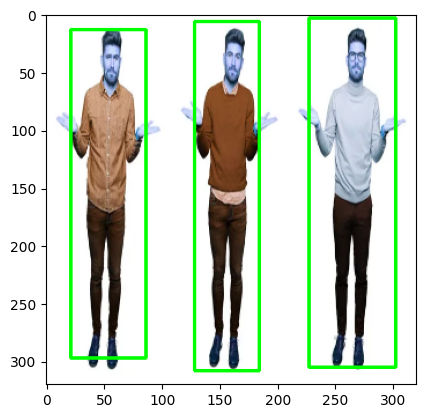

In [72]:
plt.imshow(img)